<a href="https://colab.research.google.com/github/AureohDev/Tech_Lead_Exos/blob/main/Algo/Evaluations/TP_DataVisualisation_Smartphone_Price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Mobile Price Classification

![](https://cdn.dribbble.com/users/1206328/screenshots/8502788/media/849733c31aa3bcf3ff8ac8271932d492.png)

## Analyse des prix des smartphone

Dans ce TP, nous allons réaliser une analyse graphique de données financières sur les classifications de smartphones.
L'objectif est de réaliser un Jupyter Notebook présentant les caractéristiques des données.

lien du dataset : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

train.csv est le dataset séléctionné et les données sont datées de 2017.

## Import des librairies et chargement des données

Dans cette partie, nous allons charger les librairies utilisées pour un usage classique. On affiche les 5 premiers résulats du fichier pour vérifier que le dataset est bien chargé.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/Sources/'
data = pd.read_csv(root_path+'mobile_price_classification.csv', sep = ',')

data.head()

Mounted at /content/gdrive


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## Affichage des données et commentaires sur le dataset

On affiche les différentes colonnes du dataset dont voici l'explication :

>**id** : Clé d'indexation (Int)  
>**battery_power** : Capacité de la batterie en mAh (Int)  
>**blue** : Supporte le bluetooth (Bool)  
>**clock_speed** : Fréquence du microprocesseur en GHz (Float)  
>**dual_sim** : Supporte le "Dual Sim" (Bool)  
>**fc** : Mégapixels de la caméra frontale (Int)  
>**four_g** : Supporte la norme 4G (Bool)  
>**int_memory** : Stockage de l'appareil en Go (Int)  
>**m_dep** : Epaisseur en cm (Float)  
>**mobile_wt** : Poids du téléphone en grammes (Int)  
>**n_cores** : Nombre de coeurs du processeur (Int)  
>**pc** : Mégapixels de la caméra principale (Int)  
>**px_height** : Hauteur de la résolution d'écran en pixel (Int)  
>**px_width** : Largeur de la résolution d'écran en pixel (Int)  
>**ram** : Mémoire vive en Mo (Int)  
>**sc_h** : Hauteur de l'écran en cm (Int)  
>**sc_w** : Largeur de l'écran en cm (Int)  
>**talk_time** : Durée la plus longue d'appel en une seule charge (Int)    
>**three_g** : Supporte la norme 3G (Bool)  
>**touch_screen** : Possède un écran tactile (Bool)  
>**price_range** : Gamme de prix (Int)

Pour cette dernière colonne, les valeurs numériques correspondent à une gamme de prix particulière :

>**0** : Low Cost / Entrée de Gamme  
>**1** : Medium Cost / Moyen de Gamme  
>**2** : High Cost / Haut de Gamme  
>**3** : Very High Cost / Très Haut de Gamme


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


Le Dataset comporte **2000 lignes**. Le nombre est assez important en termes de données pour être étudié et il n'est pas nécéssaire de traiter les données avec un nombre réduit.

## Données manquantes 

Le dataset est **complet** et ne possède aucune données qui ne sont pas numériques.

In [ ]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Objectif de l'exploitation des données

Ici, l'objectif principale de ce dataset est d'exploiter ses données pour permettre à une nouvelle entreprise de smartphone de se positionner sur le marché en terme de gamme par rapport aux caractéristiques les plus pertinantes sur le marché.

### Etudes des facteurs de prix d'un smartphone

Premièrement nous allons analyser si les performances d'un smartphone sont un facteur important dans la tarification d'un smartphone.



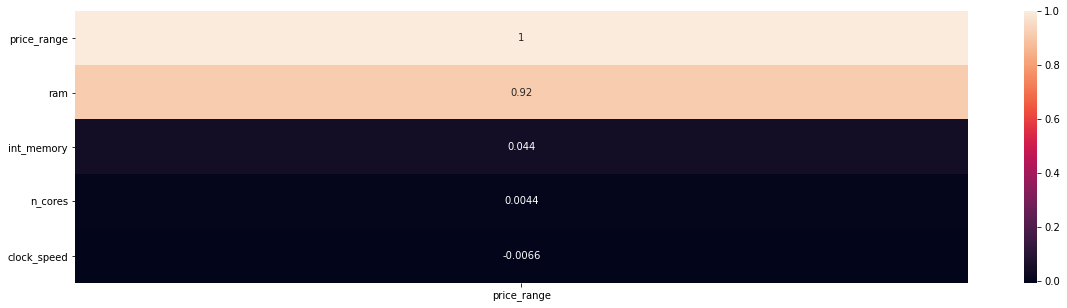

In [21]:
# dataset sur les performances de tous les smartphone

data_perf = data[['clock_speed','int_memory','n_cores','ram','price_range']].copy()


f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_perf.corr()[['price_range']].sort_values('price_range',ascending=False),annot=True, ax=ax)

On remarque que la **Ram** présente dans un smartphone est un facteur très important sur le prix ! Le stockage et la puissance du processeur ne sont pas des facteurs déterminants.

Nous allons maintenant voir si l'autonomie d'un smartphone est un facteur important dans la tarification :

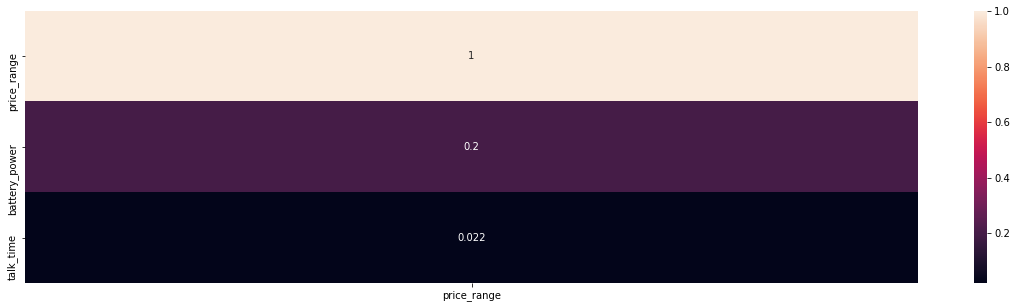

In [22]:
# dataset sur l'autonomie des smartphone

data_auto = data[['battery_power','talk_time','price_range']].copy()


f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_auto.corr()[['price_range']].sort_values('price_range',ascending=False), annot=True, ax=ax)

On remarque que la **capacité de la batterie** est un facteur qui peut influer sur la tranche de prix d'un smartphone. 

Nous allons maintenant voir si l'aspect physique des smartphones peut être un facteur sur son prix :


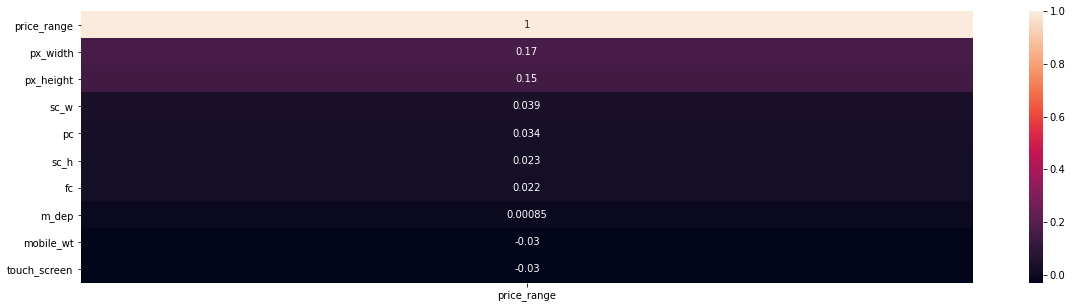

In [23]:
# dataset sur l'aspect physique des smartphone

data_aspect = data[['fc','m_dep','mobile_wt','pc','px_height','px_width','sc_h','sc_w','touch_screen','price_range']].copy()

f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_aspect.corr()[['price_range']].sort_values('price_range',ascending=False), annot=True, ax=ax)

On peut remarquer que la **resolution** (px_height et px_width) est un léger facteur pour le prix du smartphone.


Nous allons maintenant voir si la connectivité des smartphones peut influé sur son prix 

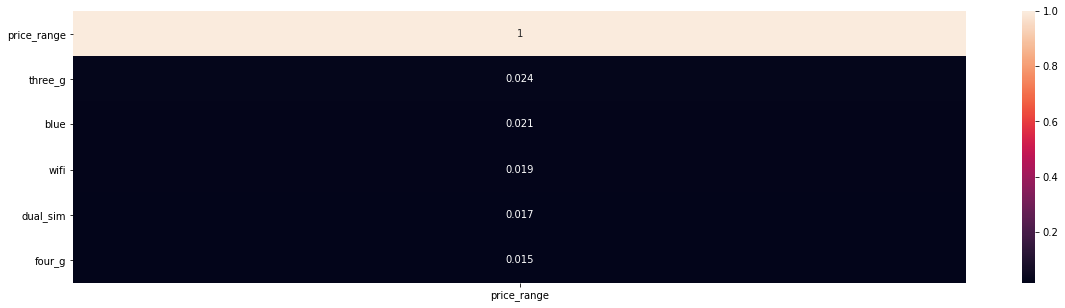

In [24]:
# dataset sur la connectivité des smartphone

data_network = data[['blue','dual_sim','four_g','three_g','wifi','price_range']].copy()


f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_network.corr()[['price_range']].sort_values('price_range',ascending=False), annot=True, ax=ax)

On remarque que la connectivité n'est pas un facteur dans le prix du téléphone, cependant la connectivité est un facteur pour déterminer une certaine récence des produits ceux possédant une 3G et une 4G sont les plus utilisés aujourd'hui.


## Etude pour un smartphone professionnel

Souhaitant fabriquer un smartphone dédié aux professionnels et bon marché, l'entreprise souhaiterais analyser le marché des smartphones à ce sujet.

Il est pertinant de filtrer le dataset en ne séléctionnant que les smartphones 4G et wifi pour usage professionel. De plus, on prend que les plus economiques (low and medium cost)

In [30]:
#Dataset avec des smartphones uniquements 4G et Wifi ainsi que bon marché
data_pro = data[(data['four_g'] == 1) & (data['wifi'] == 1) & (data['price_range'] < 2)].copy()

data_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 14 to 1998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  252 non-null    int64  
 1   blue           252 non-null    int64  
 2   clock_speed    252 non-null    float64
 3   dual_sim       252 non-null    int64  
 4   fc             252 non-null    int64  
 5   four_g         252 non-null    int64  
 6   int_memory     252 non-null    int64  
 7   m_dep          252 non-null    float64
 8   mobile_wt      252 non-null    int64  
 9   n_cores        252 non-null    int64  
 10  pc             252 non-null    int64  
 11  px_height      252 non-null    int64  
 12  px_width       252 non-null    int64  
 13  ram            252 non-null    int64  
 14  sc_h           252 non-null    int64  
 15  sc_w           252 non-null    int64  
 16  talk_time      252 non-null    int64  
 17  three_g        252 non-null    int64  
 18  touch_sc

On remarque qu'il n'y a plus que **252 entrées** au lieu de 2000. Nous allons donc pouvoir étudier ce nouveau dataset qui nous donnera permettra de mieux comprendre quelles seraient les caractéristiques pertinantes à mettre en place.

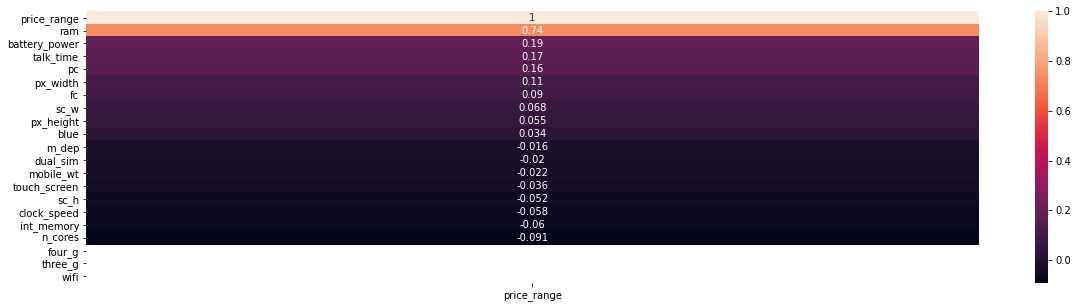

In [31]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_pro.corr()[['price_range']].sort_values('price_range',ascending=False), annot=True, ax=ax)

On remarque que pour les smartphone d'entrées et moyen de gamme les facteurs les plus importants sur le prix sont la **ram**, la **batterie**, le **temps d'appel** en une charge et la resolution en mégapixel de la **caméra frontal**.

Nous allons donc regarder quelles sont les valeurs moyennes sur la ram, la batterie et le temps d'appel pour concevoir un smartphone compétitif.

In [47]:
#smartphones low cost
data_pro_low = data_pro[data['price_range'] == 0]
#smartphones medium cost
data_pro_med = data_pro[data['price_range'] == 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Moyenne pour les low cost : 771.7350427350427
Moyenne pour les medium cost : 1707.1333333333334


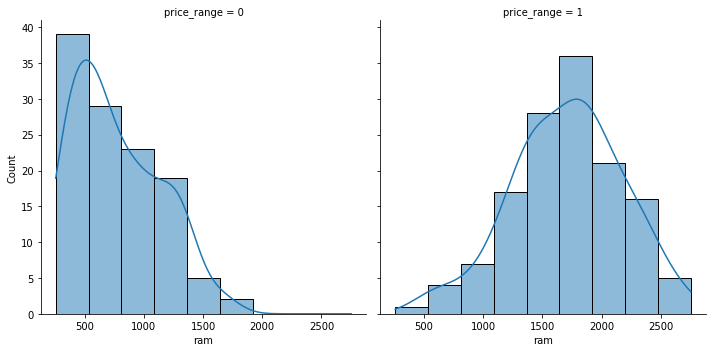

In [50]:
sns.displot(x=data_pro.ram, col=data_pro.price_range, kde=True)

print('Moyenne pour les low cost : '+str(data_pro_low['ram'].mean()))
print('Moyenne pour les medium cost : '+str(data_pro_med['ram'].mean()))

On peut constater sur ce graphique que les smartphones d'entrées de gamme sont équipés d'une mémoire vive de **500mo**.
Pour les smartphones de gamme intermédiaire, ils sont généralement équipé d'une mémoire vive entre **1,5go et 2go**.

Moyenne pour les low cost : 1054.5555555555557
Moyenne pour les medium cost : 1212.9259259259259


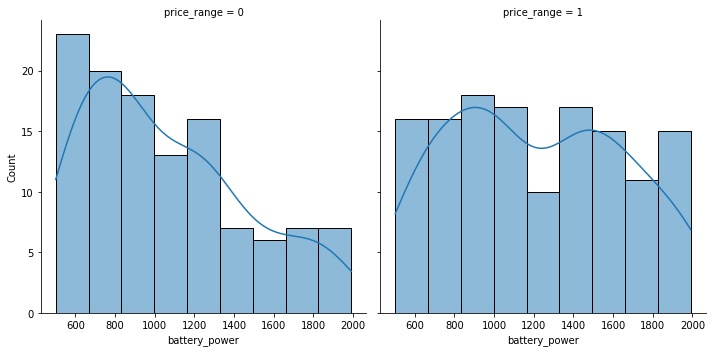

In [51]:
sns.displot(x=data_pro.battery_power, col=data_pro.price_range, kde=True)
print('Moyenne pour les low cost : '+str(data_pro_low['battery_power'].mean()))
print('Moyenne pour les medium cost : '+str(data_pro_med['battery_power'].mean()))


On peut constater sur ce graphique que les smartphones d'entrées de gamme sont équipés d'une batterie avec une **capacité de 1050mAh**.
Pour les smartphones de gamme intermédiaire, ils sont généralement équipé d'une batterie avec une **capacité de 1200mAh**.

Moyenne pour les low cost : 9.350427350427351
Moyenne pour les medium cost : 11.237037037037037


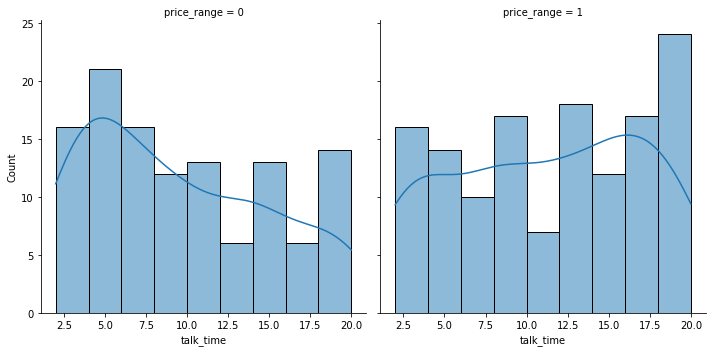

In [52]:
sns.displot(x=data_pro.talk_time, col=data_pro.price_range, kde=True)
print('Moyenne pour les low cost : '+str(data_pro_low['talk_time'].mean()))
print('Moyenne pour les medium cost : '+str(data_pro_med['talk_time'].mean()))

On peut constater sur ce graphique que les smartphones d'entrées de gamme possèdent une durée d'utilisation en **appel de 9h**.
Pour les smartphones de gamme intermédiaire, ils sont généralement possèdent une durée d'utilisation en **appel de 11h**.


La batterie et le temps d'appel en une seule charge sont des valeurs qui sont complémentaires. Il est donc intéressant de voir si le fait qu'un téléphone ai plus de batteries qu'un autre téléphone soit un facteur majeur sur la durée d'appel ?

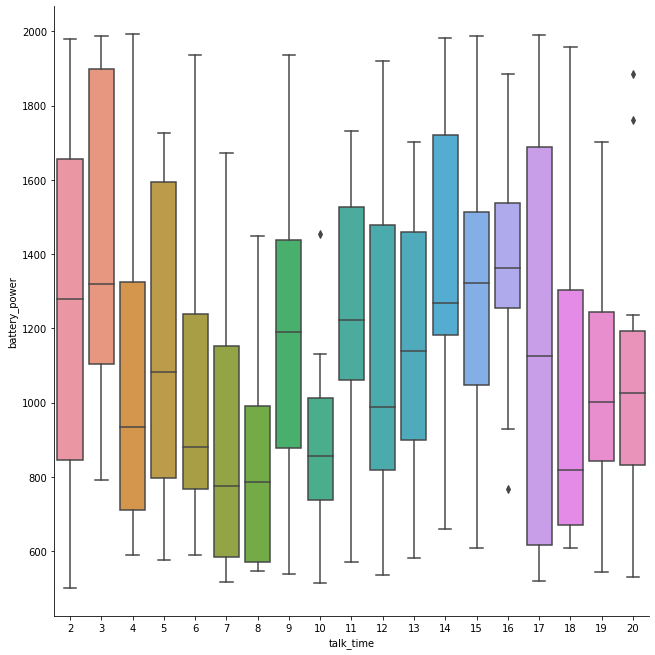

In [80]:
sns.catplot(y="battery_power", x="talk_time", data=data_pro, kind="box", height=9)

On se rend compte que parmis les téléphones bons marchés, il n'y a pas de rapports majeurs entre les deux.

On cherche donc a voir quelles peuvent êtres les éléments qui jouent en faveur d'une plus forte autonomie.

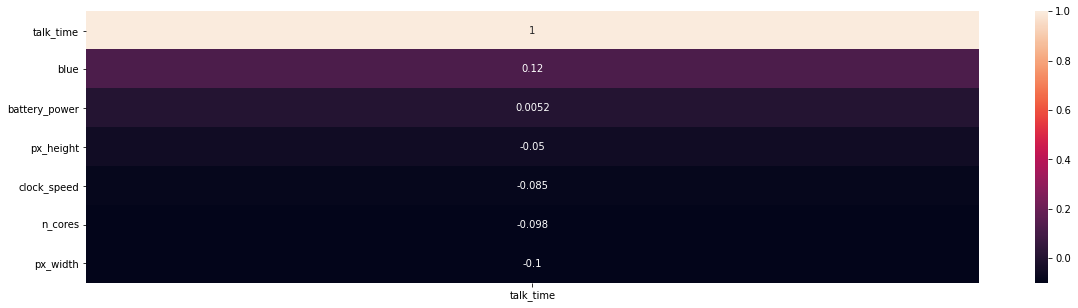

In [91]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = data_pro[['battery_power','talk_time','n_cores','clock_speed','px_height','px_width','blue']].corr()[['talk_time']].sort_values('talk_time',ascending=False), annot=True, ax=ax)

On remarque que sur les valeurs de corrélations testés, le facteur de bluetooth est un gros facteur d'autonomie. 

Sachant que la présence ou non d'un BlueTooth influe sur le temps d'appel, il est donc pertinant de vérifier si il est nécéssaire de posséder un bluetooth ou non.

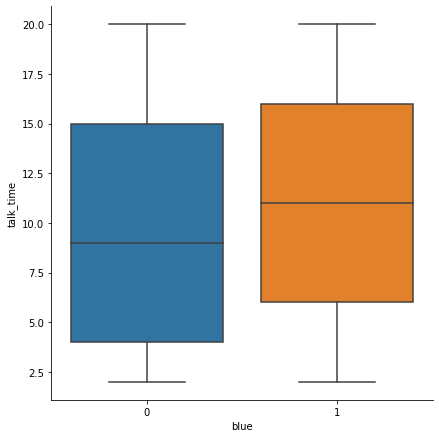

In [95]:
sns.catplot(x="blue", y="talk_time", data=data_pro, kind="box", height=6)

De part ce graphique, on peut remarquer que les appareils avec un bluetooth sont généralement plus endurant que ceux qui n'en possèdent pas.


###Conclusion

Suite à notre étude, si un entrepreneur souhaite proposer un nouveau smartphone professionnel sur le marché des smartphones bon marché, il est important que ce dernier possède les caractéristiques suivantes :

>**Connectivités**: 4G, Bluetooth & Wifi  
>**Batterie** : Une capacité comprise entre 1050mAh et 1200mAh avec une autonomie de 9h à 11h d'appel

Pour les autres caractéristiques, ces dernieres ne sont pas des facteur important pour cette mise en place sur le marché.